In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nyc = pd.read_csv('data.csv')
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)
nyc.head()

,Date,Temperature,Anomaly
0,1895,29.5,-2.6
1,1896,29.0,-3.1
2,1897,29.9,-2.2
3,1898,34.4,2.3
4,1899,30.4,-1.7


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature, random_state=11)

In [4]:
X_train.shape

(93, 1)

In [5]:
X_test.shape

(31, 1)

In [6]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [7]:
linear_regression.coef_

array([0.01995284])

In [8]:
linear_regression.intercept_

-6.958993735534584

In [9]:
predicted = linear_regression.predict(X_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'Predicted: {p:.2f}, Expected: {e:.2f}')

Predicted: 32.31, Expected: 26.00
Predicted: 33.17, Expected: 30.10
Predicted: 31.43, Expected: 32.60
Predicted: 31.69, Expected: 40.20
Predicted: 32.51, Expected: 27.90
Predicted: 32.09, Expected: 28.30
Predicted: 31.37, Expected: 33.70


In [10]:
predict = lambda x: linear_regression.intercept_ + linear_regression.coef_ * x

In [11]:
predict(2019)

array([33.32579396])

In [12]:
predict(1890)

array([30.75187736])

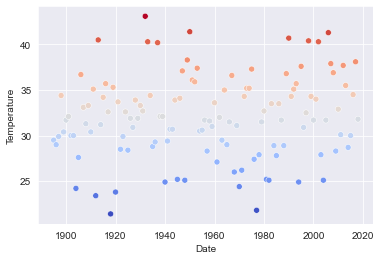

In [13]:
sns.set_style('darkgrid')
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', 
                       palette='coolwarm', legend=False)

In [14]:
axes.set_ylim(10, 70)

(10.0, 70.0)

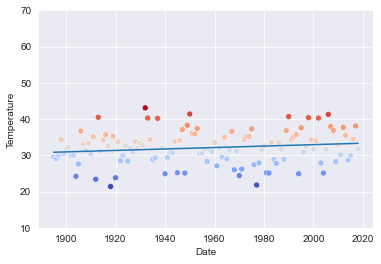

In [15]:
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)
axes.add_line(plt.Line2D(xdata=x, ydata=y))
axes.get_figure()